# Sentiment Analysis of Financial Markets

In [5]:
import os
import tweepy as tw
import pandas as pd
import re

In [6]:
consumer_key= 'JOGSChqr8oFXBzTKBZTpcoKmB'
consumer_secret= 'DWVHV3PZzV0nPoJL5sK5CpRYhpR5qgDlMHECZJEQiZ9kOBNUoS'
access_token= '1325077157777969153-INPVeQy3khix6tcSboVFt7uGvqdC1H'
access_token_secret= 'w6PPIs1F1MqPoMKEQ46AiYbAdF1crDLfe73rzLVi2v0nx'

In [7]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [ ]:
# Define the search term and the date_since date as variables
search_words = "stock markets"
new_search = search_words + "-filter:retweets"
new_search


tweets = tw.Cursor(api.search_tweets,q=search_words,lang="en").items(5000)

tweet_text= [[tweet.text] for tweet in tweets]

tweet_data = pd.DataFrame(data=tweet_text, columns=["Text"])

In [ ]:
tweet_data.head()

In [8]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-10-29 12:00:28,039 loading file C:\Users\Diyora\.flair\models\sentiment-en-mix-distillbert_4.pt


In [9]:
sentence = flair.data.Sentence("Hello sucker")
sentiment_model.predict(sentence)

In [10]:
sentence

Sentence: "Hello sucker"   [− Tokens: 2  − Sentence-Labels: {'label': [NEGATIVE (0.9303)]}]

In [11]:
sentence1 = flair.data.Sentence("you look happy")
sentiment_model.predict(sentence1)

In [12]:
sentence1

Sentence: "you look happy"   [− Tokens: 3  − Sentence-Labels: {'label': [POSITIVE (0.992)]}]

In [ ]:
sentiments = []
for tweet in tweet_data['Text']: 
    sentence = flair.data.Sentence(tweet)
    sentiment_model.predict(sentence)  
    sentiments.append(sentence.labels[0].value)
    
tweet_data['Sentiment'] = sentiments

In [ ]:
sentiment_dict={"POSITIVE": 1, "NEGATIVE": -1 }

In [ ]:
import numpy as np
tweet_data["Sentiment"]=tweet_data["Sentiment"].map(sentiment_dict)

In [ ]:
tweet_data

In [ ]:
tweet_data.to_csv(r'C:\Users\Diyora\Python\Mini Project\Our_tweets.csv')

In [14]:
# Data imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # ML imports
from sklearn.model_selection import train_test_split,GridSearchCV
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import precision_score,recall_score


In [15]:
tweet_data=pd.read_csv("5k_tweets.csv")
tweet_data['Text'] = tweet_data['Text'].apply(lambda x: x.lower())  # transform text to lowercase
tweet_data['Text'] = tweet_data['Text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x)) #accepting everything that is a letter or digit
print(tweet_data.shape)
tweet_data=tweet_data.drop("Unnamed: 0", axis= 1)
tweet_data.head(5)


(5000, 3)


,Text,Sentiment
0,a_peek_into_the_markets aapl aci dis earnings ...,1
1,a peek into the markets us stock futures down...,-1
2,us futures fall as inflation fears grow and ch...,-1
3,a peek into the markets us stock futures down ...,-1
4,shukla_tarun itccorpcom think of it as the ev...,-1


In [16]:
df = pd.read_csv("stock_data.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.head()
# clean tweet text
df['Text'] = df['Text'].apply(lambda x: x.lower())  # transform text to lowercase
df['Text'] = df['Text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x)) #accepting everything that is a letter or digit
print(df.shape)
df.head(20)

(5791, 2)


,Text,Sentiment
0,same story different dayeaders lagging aggards...,-1
1,aap bounce coming,1
2,stxs target is 238 that sucker will give almos...,-1
3,athn wants the hundreddollaroll,1
4,sm breaking upper channel resistance line to m...,1
5,apc weekly setting up long,1
6,ock star direct tv dtv continues to power high...,1
7,invn huge accumulation with no selling since j...,1
8,spy giving aap the finger we dont care about y...,-1
9,aig american international group option trader...,-1


In [17]:
a=tweet_data.append(df)

In [18]:
a.shape

(10791, 2)

<AxesSubplot:>

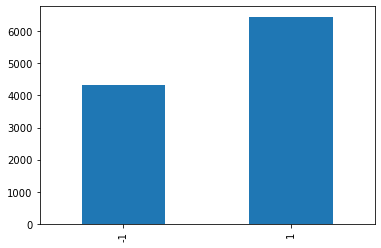

In [19]:
a['Sentiment'].value_counts().sort_index().plot.bar()

In [21]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet_data['Text'].values)
X = tokenizer.texts_to_sequences(tweet_data['Text'].values)
X = pad_sequences(X)
print("X tokenized data = ", X[:5])

X tokenized data =  [[   0    0    0    0    0    0    0    0   10  673  187    1   13 1182
  3845 2606   57   10  673  187    1   13   54    2   99   84  140   12
    57 3846]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   10  673  187    1   13   54    2   99   84  140   12
    57 3847]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   54   99  415   27  305 1309  809   22  353  129  477
  1310 3848]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   10  673  187    1   13   54    2   99   84  140   12
    57 3849]
 [   0    0    0    0    0    0    0 3850 3851 3852  250   12   37   27
     1 3853   68 3854   33  111 2041    3 3855    7  124 2607 1015   20
   416 3856]]


In [22]:
# Y as buckets of Sentiment column
y = pd.get_dummies(tweet_data['Sentiment']).values
y

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [23]:
model = Sequential()
model.add(Embedding(10000, 512, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(GRU(512, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model.add(GRU(512, dropout=0.2, recurrent_dropout=0.15))
model.add(Dense(2, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 512)           5120000   
_________________________________________________________________
dropout (Dropout)            (None, 30, 512)           0         
_________________________________________________________________
gru (GRU)                    (None, 30, 512)           1575936   
_________________________________________________________________
gru_1 (GRU)                  (None, 512)               1575936   
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 8,272,898
Trainable params: 8,272,898
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
batch_size = 32
epochs = 8

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/8
125/125 - 170s - loss: 0.3817 - accuracy: 0.7962
Epoch 2/8
125/125 - 164s - loss: 0.1869 - accuracy: 0.9287
Epoch 3/8
125/125 - 170s - loss: 0.0982 - accuracy: 0.9622
Epoch 4/8
125/125 - 176s - loss: 0.0587 - accuracy: 0.9812
Epoch 5/8
125/125 - 174s - loss: 0.0461 - accuracy: 0.9840
Epoch 6/8
125/125 - 161s - loss: 0.0359 - accuracy: 0.9883
Epoch 7/8
125/125 - 163s - loss: 0.0327 - accuracy: 0.9898
Epoch 8/8
125/125 - 155s - loss: 0.0274 - accuracy: 0.9925


In [27]:
Predictions = model.predict(X_test)

In [28]:
pos_count, neg_count = 0, 0
real_pos, real_neg = 0, 0
for i, prediction in enumerate(Predictions):
    if np.argmax(prediction)==1:
        pos_count += 1
    else:
        neg_count += 1
    if np.argmax(y_test[i])==1:    
        real_pos += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Negative predictions:', neg_count)

print('Real neutral:', real_pos)
print('Real negative:', real_neg)

Positive predictions: 531
Negative predictions: 469
Real neutral: 551
Real negative: 449


In [29]:
import matplotlib.pyplot as plt

In [30]:
print(history.history['loss'], )
predictions = [pos_count, neg_count]
real = [real_pos, real_neg]
labels = ['Positive', 'Negative']

[0.3817402124404907, 0.18693527579307556, 0.0982484519481659, 0.05874517560005188, 0.046087391674518585, 0.03589927405118942, 0.032703500241041183, 0.027449823915958405]


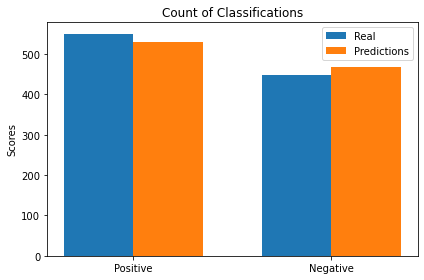

In [31]:
x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, real, width, label='Real')
rects2 = ax.bar(x + width/2, predictions, width, label='Predictions')

ax.set_ylabel('Scores')
ax.set_title('Count of Classifications')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

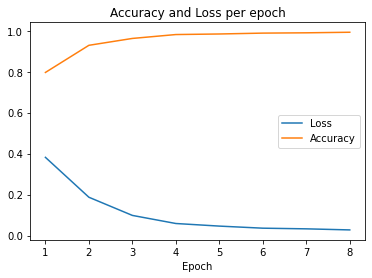

In [32]:
fig, ax = plt.subplots()
loss = history.history['loss']
epoch = [item for item in range(1,9)]
accuracy = history.history['accuracy']

ax.plot(epoch, loss, label = "Loss")
ax.plot(epoch, accuracy, label = "Accuracy")

ax.set_xlabel('Epoch')
ax.set_title('Accuracy and Loss per epoch')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)

print("The precision score is",precision_score(y_test_arg, Y_pred))
print("The recall score is", recall_score(y_test_arg, Y_pred))
print("The F1-score is", f1_score(y_test_arg, Y_pred))
print("The acc-score is", accuracy_score(y_test_arg, Y_pred))

The precision score is 0.8832391713747646
The recall score is 0.8511796733212341
The F1-score is 0.866913123844732
The acc-score is 0.856
